# Apply Summary Statistic to whole data
Goal here: 
1. Develop Summary Statistic to identify offspring of first cousins or closer
2. Apply to groups of ancient & modern Individuals

In [1]:
import numpy as np
import os as os
import sys as sys
import multiprocessing as mp
import pandas as pd
import socket
import matplotlib.pyplot as plt

### Do the Arial 
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the default
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

sys.path.append("./Python3/")  # Since now we are in the Root Directory
from statsmodels.stats.proportion import proportion_confint  # Estimate Binomial proportion Confidence Intervalls

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


### Helper Functions

In [104]:
# frac = 0.65    # The fraction of the short ROH substraction
# min_stat = 0.8 # The Minimum Stat
def calc_statistic(df, frac=0.65, cm = [4,8,12] ):
    """Calculate the statistic from cutoff.
    cm: Cutoffs [in centiMorgan]
    frac: Fraction of the lower category to substract"""
    statistic = df[f"sum_roh>{cm[2]}"] - frac * ((df[f"sum_roh>{cm[0]}"]) - df[f"sum_roh>{cm[1]}"])
    return statistic

def plot_statistic_hist(statistic, cut_off=70, bins=np.arange(-400,400,5),
                   figsize=(8,4), xlim=[-400,400]):
    """Plot histogram of Statistic"""
    plt.figure(figsize=figsize)
    ax=plt.gca()
    ax.hist(statistic, bins=bins, ec="k")
    ax.set_xlim(xlim)
    ax.set_ylim([0,200])
    ax.set_title("Distribution Summary Statistic")
    ax.axvline(x=cut_off, color="red")
    plt.show()
    
def print_statistic(statistic, cutoff=[70,100,150,200]):
    """Print # Values of statistic bigger than cutoff"""
    n = len(statistic)
    for c in cutoff:
        n1 = np.sum(statistic>c)
        print(f"Bigger than {c}: {n1}/{n}")
        
def estimate_ci_fractions(df, col_c="sum", col_n="count", method="wilson"):
    """Estimate Confidence Intervals from Binomial Fractions.
    Add these fractions as two new columns to data frame
    (frac_low, frac_high) and return dataframe
    df: Dataframe to use
    col_c: Count Column
    col_n Total Count Column
    method: Which binomial proportion confidence interval to use"""
    c, n = df[col_c].values, df[col_n].values
    low, high = proportion_confint(c,n,method=method)
    df["frac_low"], df["frac_high"] = low, high
    return df

def plot_bars_fractions(df, col="frac", col_l="frac_low", col_h="frac_high", 
                        figsize=(18,5), bar_width=0.9, fs_l=7, ec="k", c="coral", legend=True):
    """Plot Fractions in dataframe df. 
    col: Which column has values
    col_l, col_h: Values for low & high CIs"""

    x = np.arange(len(df))
    y = df[col].values

    plt.figure(figsize=figsize)
    ax=plt.gca()
    ax.bar(x, y, width = bar_width, color = c, edgecolor = ec)
    # yerr=[df_t["frac_low"], df_t["frac_high"]]

    # general layout
    ax.set_xticks(x)
    ax.set_xticklabels(df_t.index.values, rotation=90, fontsize=fs_l)
    ax.set_xlim([-0.5,len(df_t)])
    ax.set_ylim([0,1])
    ax.set_ylabel("Fraction Individuals with Statistic > 70")
    ax.vlines(x, df[col_l], df[col_h], lw=0.5, label="95% CI Intervalls")
    if legend:
        ax.legend(loc="upper right")
    plt.show()

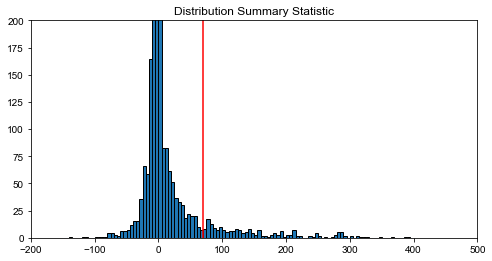

Bigger than 70: 216/3232
Bigger than 100: 152/3232
Bigger than 150: 92/3232
Bigger than 200: 60/3232


In [3]:
df = pd.read_csv("./Empirical/roh_all_inds.csv", sep='\t')
statistic = calc_statistic(df)
plot_statistic_hist(statistic, xlim=[-200,500], cut_off=70)
print_statistic(statistic)

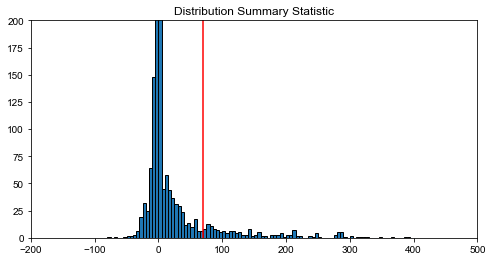

Bigger than 70: 179/1941
Bigger than 100: 127/1941
Bigger than 150: 80/1941
Bigger than 200: 54/1941


In [4]:
df_m = df[df["age"]==0].copy()
statistic = calc_statistic(df_m)
plot_statistic_hist(statistic, cut_off=70, xlim=[-200,500])
print_statistic(statistic)

## Rank Individuals by statistic

In [ ]:
statistic = calc_statistic(df)
idx = np.argsort(statistic)
df.iloc[idx,:]

In [ ]:
### Calculate for Modern Samples
df_m = df[df["age"]==0].copy()
statistic = calc_statistic(df_m)
idx = np.argsort(statistic)
df_m.iloc[idx,:]

# Area 51